##Import Library

In [1]:
#memasang drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Mengambil data wine csv dan menghapus kolom 'wine' yang berisi kategori wine
data = pd.read_csv("/content/drive/MyDrive/Bahan port/Clustering/Wine/wine.csv")
data = data.drop(['Wine'], axis=1)

In [5]:
data.head()

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


#Exploratory Data Analysis

In [6]:
data.describe() # menampilkan summary data berupa jumlah, mean, standar deviasi, nilai minmax, q1,q2, dan q3

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [7]:
data.info() # memberikan info tiap kolom berupa jumlah baris non missing dan tipe data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic.acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Acl                   178 non-null    float64
 4   Mg                    178 non-null    int64  
 5   Phenols               178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid.phenols  178 non-null    float64
 8   Proanth               178 non-null    float64
 9   Color.int             178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD                    178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


<ipython-input-8-fa2625df0cf9>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.iloc[:,i], kde=True, hist=True) #membuat plot distribusi berupa histogram dengan metode kernel density estimate
<ipython-input-8-fa2625df0cf9>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.iloc[:,i], kde

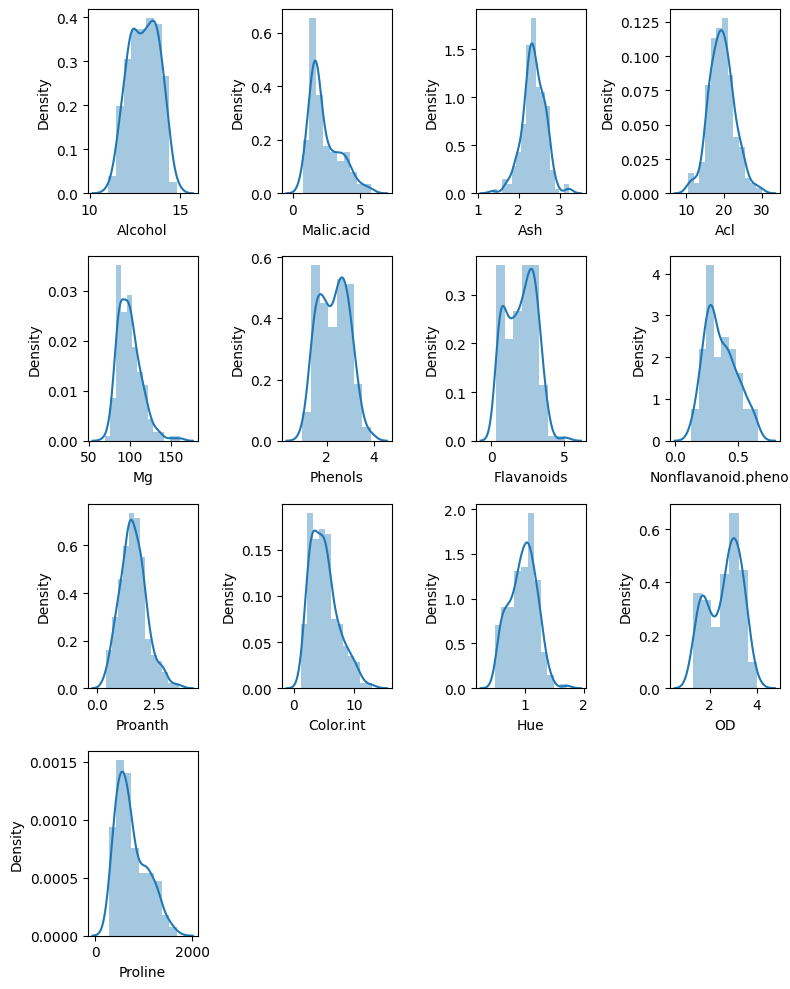

In [8]:
fig = plt.figure(figsize=(8,10)) # membuat plot siza 8x10
for i in range(len(data.columns)): #untuk i merupakan kolom pada 'data'
    fig.add_subplot(4,4,i+1) # membuat subplot secara berurutan dari kolom 1 hingga 13 dengan 4 baris dan masing-masing baris sebanyak 4 plot
    sns.distplot(data.iloc[:,i], kde=True, hist=True) #membuat plot distribusi berupa histogram dengan metode kernel density estimate
    plt.xlabel(data.columns[i]) # x axis label dari plot merupakan nama kolom itu sendiri
plt.tight_layout() #otomatis menyesuaikan parameter dari plot agar sesuai dengan ukuran plot
plt.show() #menampilkan plot

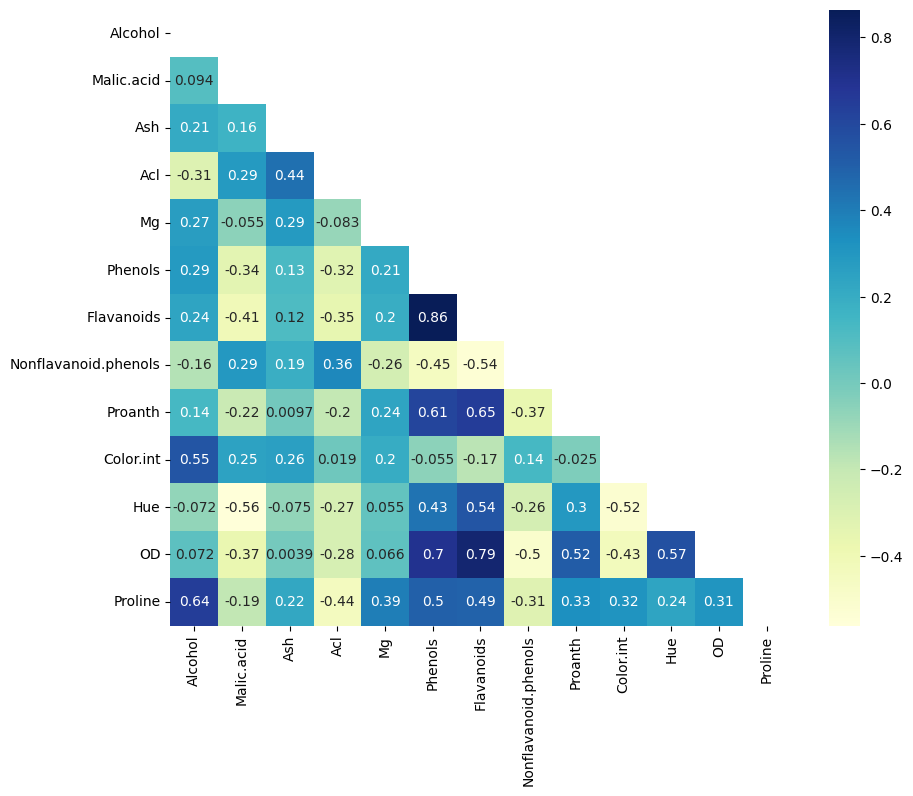

In [9]:
plt.figure(figsize=(10, 8)) #membuat plot dengan ukuran 10x8
mask = np.triu(np.ones_like(data.corr())) #membuat matriks segitiga keatas dengan array berukuran sama dengan data
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True, mask=mask); #menampilkan heatmap dengan korelasi antar variabel, colormap dengan kode Y1GnBU, dengan data value di setiap cell dari 'data'

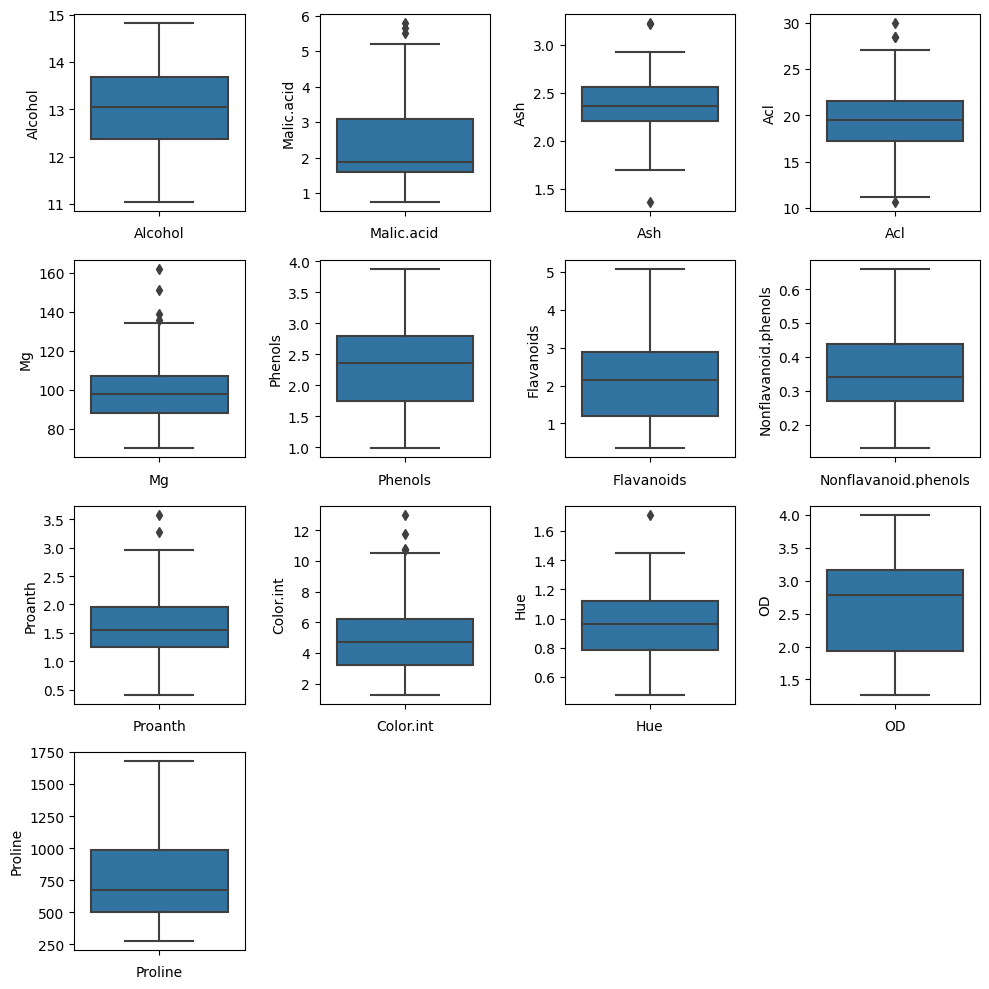

In [10]:
fig = plt.figure(figsize=(10,10))  #membuat plot dengan ukuran 10x10
for i in range(len(data.columns)): #untuk i merupakan kolom pada 'data'
    fig.add_subplot(4,4,i+1) # membuat subplot secara berurutan dari kolom 1 hingga 13 dengan 4 baris dan masing-masing baris sebanyak 4 plot
    sns.boxplot(y=data.iloc[:,i]) #membuat plot berupa boxplot dengan y axix merupakan value dari kolom pada 'data'
    plt.xlabel(data.columns[i]) # x axis label dari plot merupakan nama kolom itu sendiri
plt.tight_layout()  #otomatis menyesuaikan parameter dari plot agar sesuai dengan ukuran plot
plt.show() #menampilkan plot

#Clustering

In [11]:
from scipy.cluster.vq import whiten, kmeans, vq #import dataset
skala_data = whiten(data) #melakukan standarisasi data
print(skala_data) #menampilkan hasil standarisasi

[[17.57782045  1.53500398  8.88247841 ...  4.56283226  5.53677584
   3.39148583]
 [16.30549754  1.5978404   7.82242955 ...  4.60670565  4.80230557
   3.34371843]
 [16.25608694  2.11848502  9.75976023 ...  4.51895888  4.47744372
   3.77362508]
 ...
 [16.39196609  3.84199826  8.26107046 ...  2.58852984  2.20341079
   2.65905227]
 [16.26843959  2.32494755  8.66315796 ...  2.63240323  2.28815736
   2.67497474]
 [17.45429396  3.6804189  10.0156341  ...  2.67627662  2.2599085
   1.78331649]]


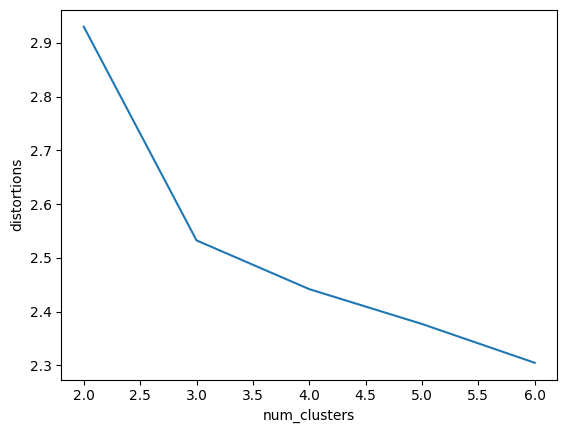

In [12]:
distortions = [] #menentukan jarak ke titik
num_clusters = range(2, 7) #membuat parameter cluster 2 sampai 7
for i in num_clusters: #untuk i merupakan number of cluster
    centroids, distortion = kmeans(skala_data, i) # membuat model menggunakan jarak dengan metode centroid dengan data 'skala_data' untuk masing masing jumlah cluster
    distortions.append(distortion) # appendix merupakan nilai distorsi
elbow_df = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions}) #membuat dataframe yang terdiri dari jumlah cluster dan nilai distorsi
sns.lineplot(x='num_clusters', y='distortions', data=elbow_df) # membuat elbow plot, yaitu linelot antara jumlah cluster dengan nilai distorsi
plt.show() #menunjukkan plot

dari grafik elbow diatas dapat dilihat bahwa yang memiliki penurunan paling tajam atau sudut paling siku adalah kluster 3 sehingga jumlah kluster yang terbaik adalah 3. Distorsi sendiri merupakan total error varians, maka dari itu semakin banyak jumlah cluster semakin kecil error variansnya. Sudut mendekati siku pada kluster 3 juga menunjukkan bahwa apabila jumlah kluster lebih dari 3 tidak menunjukkan perbedaan yang terlalu signifikan, sehingga jumlah kluster optimal adalah 3 kluster.

In [13]:
data.columns #menunjukkan nama kolom

Index(['Alcohol', 'Malic.acid', 'Ash', 'Acl', 'Mg', 'Phenols', 'Flavanoids',
       'Nonflavanoid.phenols', 'Proanth', 'Color.int', 'Hue', 'OD', 'Proline'],
      dtype='object')

In [14]:
skala_data = pd.DataFrame(skala_data, columns=['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity',
                                               'Magnesium','Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
                                               'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'])
#membuat dataframe dari skala data untuk masing masing variabel/kolom

In [15]:
cluster_centers, distortion = kmeans(skala_data, 3) #membuat model dengan observasi skala_data dan jmlah cluster 3
skala_data['label'], distortions_list = vq(skala_data, cluster_centers) #generate label dari cluster

In [16]:
labels = skala_data['label'] #membuat dataframe labels dengan kolom label
skala = skala_data.drop('label', axis=1) #membuat dataframe skala dengan menghapus kolom label
print(labels) #menunjukkan dataframe labels

0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: label, Length: 178, dtype: int32


In [17]:
from sklearn.decomposition import PCA #import library
model = PCA(n_components=2) #membuat model pca dengan 2 komponen
model.fit(skala)#melihat model
X = model.transform(skala) #Melakukan transform pada 'model'

In [18]:
X_final = pd.DataFrame(X, columns=['X', 'Y']) #membuat data frame dari X
X_final.head() #Menunjukkan data 'X_final'

,X,Y
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831


In [19]:
labels = pd.DataFrame(labels, columns=['label']) #membuat dataframe dari 'label'
dfs = [X_final, labels] #menggabung dataframe
final_df = pd.concat(dfs, axis=1) #menggabungkan dataframe melalui kolom
final_df.head()  #Menunjukkan data 'final_df'

,X,Y,label
0,3.316751,-1.443463,0
1,2.209465,0.333393,0
2,2.516740,-1.031151,0
3,3.757066,-2.756372,0
4,1.008908,-0.869831,0


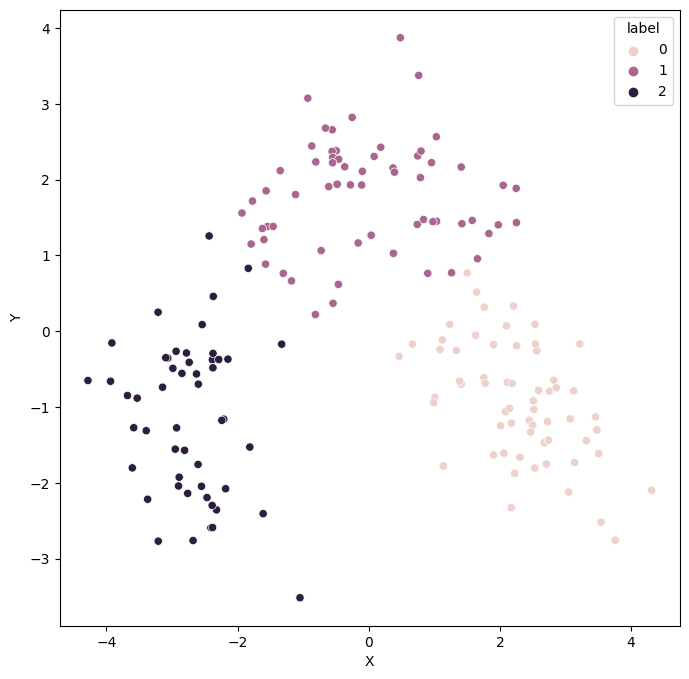

In [20]:
plt.figure(figsize=(8, 8)) #membuat lot dengan size 8x8
sns.scatterplot(x='X', y='Y', hue='label', data=final_df); #membuat scatterplot untuk melihat persebaran cluster

Dari scatterplot diatas dapat dilihat apabila dibentuk 3 cluster masih terdapat data yang berada di daerah cluster lain sehingga dapat dicoba untuk  metode lain dengan jumlah cluster berbeda